In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import descartes
from shapely.geometry import Polygon
import geopandas as gpd
import os.path
from PIL import Image
import rasterio

In [2]:
# read in all of your files
os.chdir("/Users/aminaly/Box Sync/mountain_biodiversity")

kba = gpd.read_file(os.getcwd() + "/data/KBA/KBA2020/KBAsGlobal_2020_September_02_POL.shp")
wdpa0 = gpd.read_file(os.getcwd() + "/data/WDPA/WDPA_May2021_Public_shp/WDPA_May2021_Public_shp_0/WDPA_May2021_Public_shp-polygons.shp")
wdpa1 = gpd.read_file(os.getcwd() + "/data/WDPA/WDPA_May2021_Public_shp/WDPA_May2021_Public_shp_1/WDPA_May2021_Public_shp-polygons.shp")
wdpa2 = gpd.read_file(os.getcwd() + "/data/WDPA/WDPA_May2021_Public_shp/WDPA_May2021_Public_shp_2/WDPA_May2021_Public_shp-polygons.shp")
gmba = gpd.read_file(os.getcwd() + "/data/GMBA/GMBA_Inventory_V2_210420_GME/GMBA_Inventory_V2_210420_GME.shp")

Image.MAX_IMAGE_PIXELS = 933120000
mountain = Image.open(os.getcwd() + "/data/WDPA/K1_binary_from_WCMC_2021.tiff")
mountain.show()

In [15]:
#combine the three wdpa files into 1
wdpa = gpd.GeoDataFrame(pd.concat([wdpa0, wdpa1, wdpa2]))
wdpa.crs = {'init': 'epsg:4326', 'no_defs': True}
wdpa.to_file(os.getcwd() + "/data/WDPA/WDPA_May2021_Public_shp/WDPA_May2021_Public/WDPA_May2021_Public_shp-polygons.shp", driver='ESRI Shapefile')

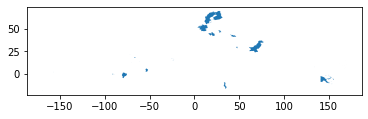

In [65]:
#pull the data we want to use as the subest
bbox = gpd.GeoSeries([Polygon([(35,-3), (55, -3), (55, 10), (35, 10)])])
box = gpd.GeoDataFrame({'geometry': bbox})
box.crs = {'init': 'epsg:4326', 'no_defs': True}

#sample 25 random countries and those will be what we run on 
world = gpd.read_file(os.getcwd() + "/data/World/world_shp/world.shp")
world_sample = world.sample(25)
world_sample.plot()


In [73]:
wdpa_clipped = gpd.overlay(wdpa, world_sample, how="intersection")
kba_clipped = gpd.overlay(kba, world_sample, how="intersection")
gmba_clipped = gpd.overlay(gmba, world_sample, how="intersection")

In [74]:
#Once we've clipped them, save them out as shapefiles
kba_clipped.to_file(os.getcwd() + "/data/KBA/KBA20f20/clipped_KBAsGlobal_2020_September_02_POL.shp", 
                    driver='ESRI Shapefile')

wdpa_clipped.to_file(os.getcwd() + 
                     "/data/WDPA/WDPA_May2021_Public_shp/WDPA_May2021_Public/clipped_WDPA_May2021_Public_shp-polygons.shp",
                   driver='ESRI Shapefile')

gmba_clipped.to_file(os.getcwd() + "/data/GMBA/GMBA_Inventory_V2_210420_GME/GMBA_Inventory_V2_210420_GME.shp.shp", 
                    driver='ESRI Shapefile')

In [77]:
world_sample.crs

{'init': 'epsg:4326'}

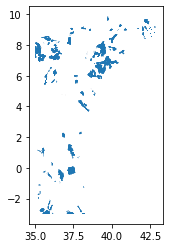

In [27]:
wdpa_clip_kba = gpd.overlay(wdpa_clipped, kba_clipped, how = "intersection")
all_intersec = gpd.overlay(wdpa_clip_kba, gmba_clipped, how = "intersection")
all_intersec.plot()
all_intersec.to_file(os.getcwd() + "/data/wdpa_kba_gmba/wdpa_kba_gmba.shp", driver = 'ESRI Shapefile')

In [ ]:
## for each country/iso in KBA
## intersect WDPA and KBA
## intersection.area / KBA.area * 100